# Import Library

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [35]:
df = pd.read_csv('/content/datapenjualan20202023.csv')
df.head()

,1,1/2/2020,TOKO MURAH,JAM LOKESWARA,1000,9840000,Jakarta,106.82274,-6.17447,ID,Asia,Jakarta.1,ID-JI,POINT (-6.17447 106.82274),WIB+07:00
0,2,1/2/2020,TOKO MURAH,BATIK LONTARA,120,8400000.0,Bandung,107.61102,-6.92155,ID,Asia,Jawa Barat,ID-SU,POINT (-6.92155 107.61102),WIB+07:00
1,3,1/2/2020,TOKO APRILIA SUKRISNI,JAM LOKESWARA,6000,62910000.0,Surabaya,112.73783,-7.24597,ID,Asia,Jawa Timur,ID-YO,POINT (-7.24597 112.73783),WITA+08:00
2,4,1/2/2020,TOKO APRILIA SUKRISNI,JAM WISH,408,4855200.0,Medan,98.67383,3.58967,ID,Asia,Sumatera Utara,ID-JK,POINT (3.58967 98.67383),WIB+07:00
3,5,1/2/2020,TOKO APRILIA SUKRISNI,BATIK BESUREK,140,1162000.0,Yogyakarta,102.25783,-1.35790,ID,Asia,Yogyakarta,ID-JB,POINT (-1.3579 102.25783),WIB+07:00
4,6,1/2/2020,TOKO MAJU TERUS,JAM LOKESWARA,820,8597700.0,Denpasar,115.21912,-8.65250,ID,Asia,Bali,ID-SS,POINT (-8.6525 115.21912),WITA+08:00


# Preprocessing

In [43]:
df = df.rename(columns={
    '1/2/2020': 'Tanggal',
    'kolom_lain_baru': 'Nama Toko',
    'JAM LOKESWARA': 'Nama Produk',
    '1000': 'Jumlah Terjual',
    '9840000': 'Total Penjualan',
    'Jakarta': 'Kota',
    'Jakarta.1': 'Provinsi'
    })
df.head()

,1,Tanggal,Nama Toko,Nama Produk,Jumlah Terjual,Total Penjualan,Kota,106.82274,-6.17447,ID,Asia,Provinsi,ID-JI,POINT (-6.17447 106.82274),WIB+07:00
0,2,1/2/2020,TOKO MURAH,BATIK LONTARA,120,8400000.0,Bandung,107.61102,-6.92155,ID,Asia,Jawa Barat,ID-SU,POINT (-6.92155 107.61102),WIB+07:00
1,3,1/2/2020,TOKO APRILIA SUKRISNI,JAM LOKESWARA,6000,62910000.0,Surabaya,112.73783,-7.24597,ID,Asia,Jawa Timur,ID-YO,POINT (-7.24597 112.73783),WITA+08:00
2,4,1/2/2020,TOKO APRILIA SUKRISNI,JAM WISH,408,4855200.0,Medan,98.67383,3.58967,ID,Asia,Sumatera Utara,ID-JK,POINT (3.58967 98.67383),WIB+07:00
3,5,1/2/2020,TOKO APRILIA SUKRISNI,BATIK BESUREK,140,1162000.0,Yogyakarta,102.25783,-1.35790,ID,Asia,Yogyakarta,ID-JB,POINT (-1.3579 102.25783),WIB+07:00
4,6,1/2/2020,TOKO MAJU TERUS,JAM LOKESWARA,820,8597700.0,Denpasar,115.21912,-8.65250,ID,Asia,Bali,ID-SS,POINT (-8.6525 115.21912),WITA+08:00


In [51]:
df = df[['Tanggal', 'Nama Toko', 'Nama Produk', 'Jumlah Terjual', 'Total Penjualan', 'Kota', 'Provinsi']]

In [50]:
df.head()

,Tanggal,Nama Toko,Nama Produk,Jumlah Terjual,Total Penjualan,Kota,Provinsi
0,1/2/2020,TOKO MURAH,BATIK LONTARA,120,8400000.0,Bandung,Jawa Barat
1,1/2/2020,TOKO APRILIA SUKRISNI,JAM LOKESWARA,6000,62910000.0,Surabaya,Jawa Timur
2,1/2/2020,TOKO APRILIA SUKRISNI,JAM WISH,408,4855200.0,Medan,Sumatera Utara
3,1/2/2020,TOKO APRILIA SUKRISNI,BATIK BESUREK,140,1162000.0,Yogyakarta,Yogyakarta
4,1/2/2020,TOKO MAJU TERUS,JAM LOKESWARA,820,8597700.0,Denpasar,Bali


In [52]:
df.isna().sum()

,0
Tanggal,0
Nama Toko,0
Nama Produk,0
Jumlah Terjual,0
Total Penjualan,0
Kota,0
Provinsi,0


In [53]:
df.duplicated().sum()

np.int64(0)

# Feature Engineering

In [65]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='mixed')

In [66]:
df['Harga Per Unit'] = df['Total Penjualan'] / df['Jumlah Terjual']

In [67]:
Q1 = 2972700
Q3 = 10500000
Batas_Atas = 21790950

In [69]:
bins = [0, Q1, Q3, Batas_Atas, df['Total Penjualan'].max() + 1]
labels = ['Low', 'Medium', 'High', 'Bulk/Outlier']

In [70]:
df['Kategori Penjualan'] = pd.cut(
    df['Total Penjualan'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

/tmp/ipython-input-1974967242.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


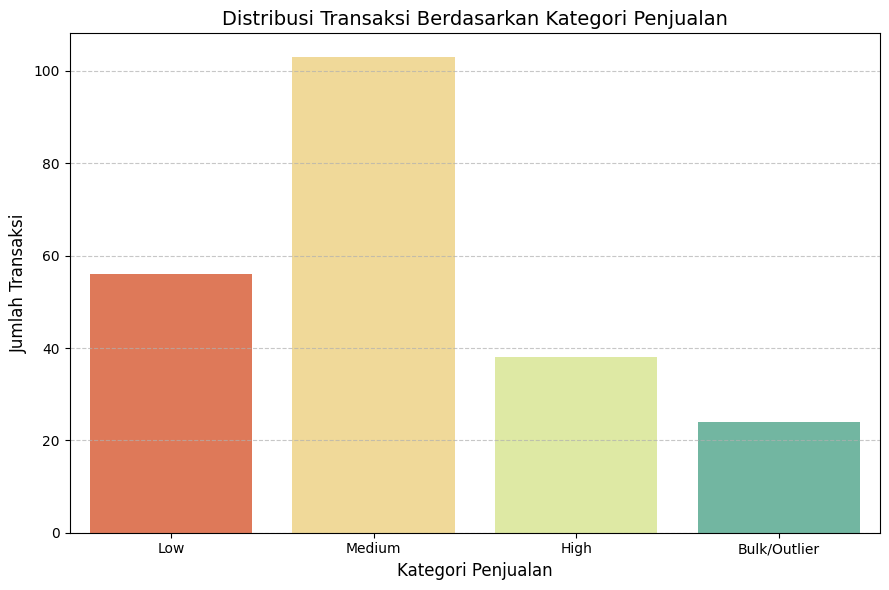

In [71]:
category_counts = df['Kategori Penjualan'].value_counts().reset_index()
category_counts.columns = ['Kategori', 'Count']

category_order = ['Low', 'Medium', 'High', 'Bulk/Outlier']

plt.figure(figsize=(9, 6))
sns.barplot(
    x='Kategori',
    y='Count',
    data=category_counts,
    order=category_order,
    palette='Spectral'
)
plt.title('Distribusi Transaksi Berdasarkan Kategori Penjualan', fontsize=14)
plt.xlabel('Kategori Penjualan', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# EDA

In [74]:
IQR = Q3 - Q1
batas_atas_outlier_rp = Q3 + 1.5 * IQR

print(f"Batas Atas Outlier (Q3 + 1.5 * IQR): Rp {batas_atas_outlier_rp:,.0f}")
outliers = df[df['Total Penjualan'] > batas_atas_outlier_rp]
print(f"Total Outlier Ditemukan: {len(outliers)}")

Batas Atas Outlier (Q3 + 1.5 * IQR): Rp 21,790,950
Total Outlier Ditemukan: 24


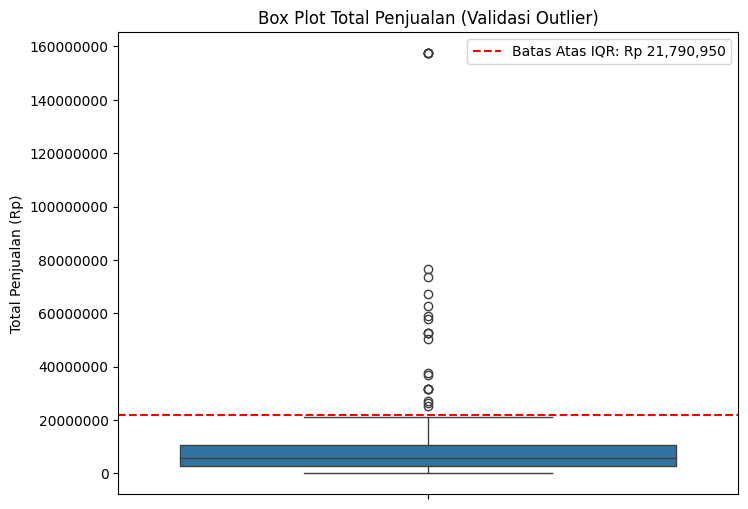

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Total Penjualan'])
plt.axhline(batas_atas_outlier_rp, color='red', linestyle='--', label=f'Batas Atas IQR: Rp {batas_atas_outlier_rp:,.0f}')
plt.title('Box Plot Total Penjualan (Validasi Outlier)')
plt.ylabel('Total Penjualan (Rp)')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

In [85]:
numeric_cols = ['Jumlah Terjual', 'Total Penjualan', 'Harga Per Unit']
correlation_matrix = df[numeric_cols].corr()

print("HASIL ANALISIS KORELASI (DATA NON-OUTLIER)")
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))

HASIL ANALISIS KORELASI (DATA NON-OUTLIER)
|                 | Jumlah Terjual   | Total Penjualan   | Harga Per Unit   |
|:----------------|:-----------------|:------------------|:-----------------|
| Jumlah Terjual  | 1                | 0.646084          | -0.268261        |
| Total Penjualan | 0.646084         | 1                 | -0.0889791       |
| Harga Per Unit  | -0.268261        | -0.0889791        | 1                |


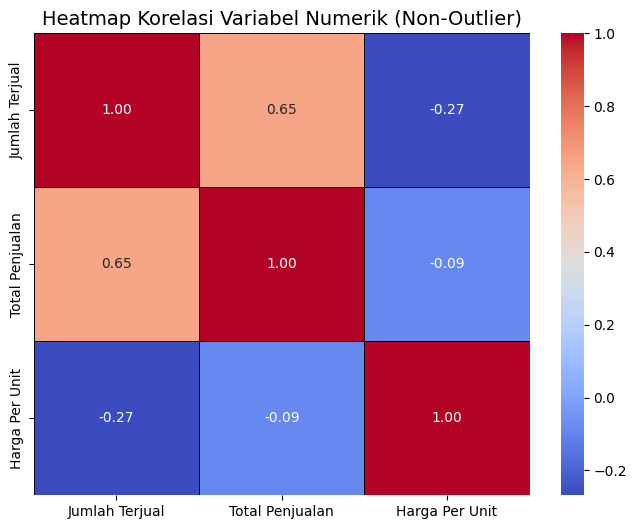

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    linecolor='black'
)
plt.title('Heatmap Korelasi Variabel Numerik (Non-Outlier)', fontsize=14)
plt.show()

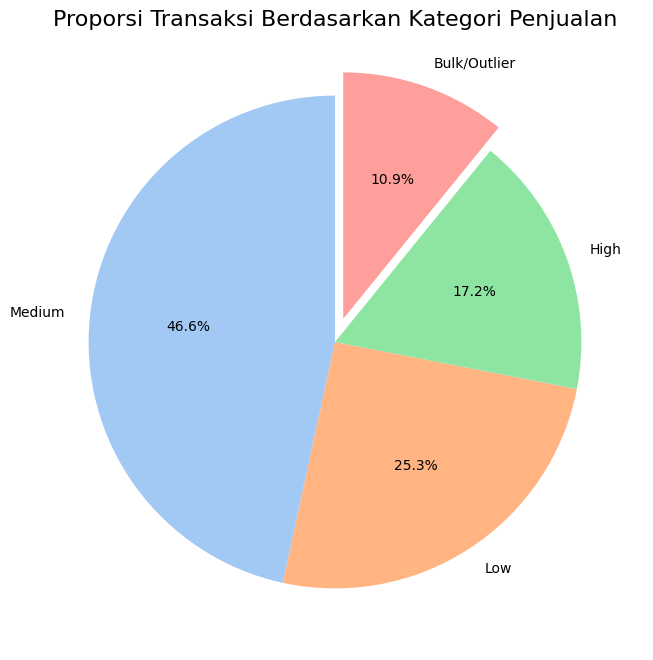

In [94]:
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts['Count'],
    labels=category_counts['Kategori'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("pastel"),
    explode=(0, 0, 0, 0.1)
)
plt.title('Proporsi Transaksi Berdasarkan Kategori Penjualan', fontsize=16)
plt.show()